# Perturbed polynomials (small)

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd
import math

In [3]:
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.pylab as pl
import seaborn as sns
matplotlib.rcParams['figure.dpi'] = 125

### Visualizations of root values

Analyzing perturbed coefficients and roots of
$$p(x) = (x-1)(x-2)(x-3)$$
Expanding, we have
$$p(x) = x^3 - 6x^2 + 11x - 6$$
The roots are:

In [4]:
coeff = [1, -6, 11, -6]
roots = np.roots(coeff)
print(roots)

[3. 2. 1.]


In [5]:
#a_exp = list(range(-10, 1, 0.5)) # consecutive numbers
a_exp = list(np.arange(-10, 1, 0.5)) # consecutive numbers
a_vals = [0] + list(map(lambda x:pow(10, x), a_exp))
print(a_vals)

[0, 1e-10, 3.1622776601683795e-10, 1e-09, 3.1622776601683795e-09, 1e-08, 3.162277660168379e-08, 1e-07, 3.162277660168379e-07, 1e-06, 3.162277660168379e-06, 1e-05, 3.1622776601683795e-05, 0.0001, 0.00031622776601683794, 0.001, 0.0031622776601683794, 0.01, 0.03162277660168379, 0.1, 0.31622776601683794, 1.0, 3.1622776601683795]


Perturbing coefficients

In [6]:
coeff_ck = coeff[1:]
print(coeff_ck)

[-6, 11, -6]


In [7]:
def perturb_coeff(a, coeff):
    coeff_perturbed = []
    for c_k in coeff:
        e_k = np.random.normal(0, 1) # mu = 0, sigma = 1
        coeff_perturbed.append(c_k*(1 + a*e_k))
    return coeff_perturbed

def dist(coeff_ck, new_coeff_ck):
    return [i - j for i, j in zip(new_coeff_ck, coeff_ck)]

def roots_perturb_coeff(perturb_coeff):
    perturb_coeff_full = [1] + perturb_coeff
    return np.roots(perturb_coeff_full)

def real_roots(roots):
    return list(roots.real[abs(roots.imag)<1e-5])

In [8]:
# testing

example_a = 10
example_perturb_coeff = perturb_coeff(example_a, coeff_ck)
example_roots = roots_perturb_coeff(example_perturb_coeff)
example_real_roots = real_roots(example_roots)
print('perturbed coefficients:', example_perturb_coeff, '\n')
print('all roots of perturbed polynomial:', example_roots, '\n')
print('real roots of perturbed polynomial:', example_real_roots)

perturbed coefficients: [-56.27263253676975, -18.99143257700208, -25.034460047968548] 

all roots of perturbed polynomial: [56.61588625+0.j         -0.17162686+0.64243681j -0.17162686-0.64243681j] 

real roots of perturbed polynomial: [56.615886254077026]


### Plots

In [9]:
a_roots = []
for a in a_vals:
    trial_coeff = perturb_coeff(a, coeff_ck)
    trial_roots = roots_perturb_coeff(trial_coeff)
    trial_real_roots = real_roots(trial_roots)
    a_roots.append(trial_real_roots)

a_roots_df = pd.DataFrame(a_roots)
a_roots_df.insert(0, 'a', a_vals)
a_roots_df.insert(0, 'a_exp', [float('-inf')] + a_exp)
a_roots_df.insert(0, 'a_rounded', a_roots_df['a'].round(2))
print(a_roots_df.shape)
a_roots_df.head(10)

(23, 6)


,a_rounded,a_exp,a,0,1,2
0,0.0,-inf,0.000000e+00,3.000000,2.000000,1.000000
1,0.0,-10.0,1.000000e-10,3.000000,2.000000,1.000000
2,0.0,-9.5,3.162278e-10,3.000000,2.000000,1.000000
3,0.0,-9.0,1.000000e-09,3.000000,2.000000,1.000000
4,0.0,-8.5,3.162278e-09,3.000000,2.000000,1.000000
5,0.0,-8.0,1.000000e-08,2.999999,2.000000,1.000000
6,0.0,-7.5,3.162278e-08,2.999999,2.000001,1.000000
7,0.0,-7.0,1.000000e-07,3.000000,2.000000,1.000000
8,0.0,-6.5,3.162278e-07,2.999996,2.000001,1.000001
9,0.0,-6.0,1.000000e-06,2.999995,2.000014,0.999995


In [10]:
a_roots_df_melt = pd.melt(a_roots_df, id_vars=['a', 'a_exp', 'a_rounded'], var_name='roots', value_name='values')
a_roots_df_melt = a_roots_df_melt.sort_values(by=['a'])
print(a_roots_df_melt.shape)
a_roots_df_melt.head()

(69, 5)


,a,a_exp,a_rounded,roots,values
0,0.000000e+00,-inf,0.0,0,3.0
46,0.000000e+00,-inf,0.0,2,1.0
23,0.000000e+00,-inf,0.0,1,2.0
1,1.000000e-10,-10.0,0.0,0,3.0
47,1.000000e-10,-10.0,0.0,2,1.0


$a$ versus real root values

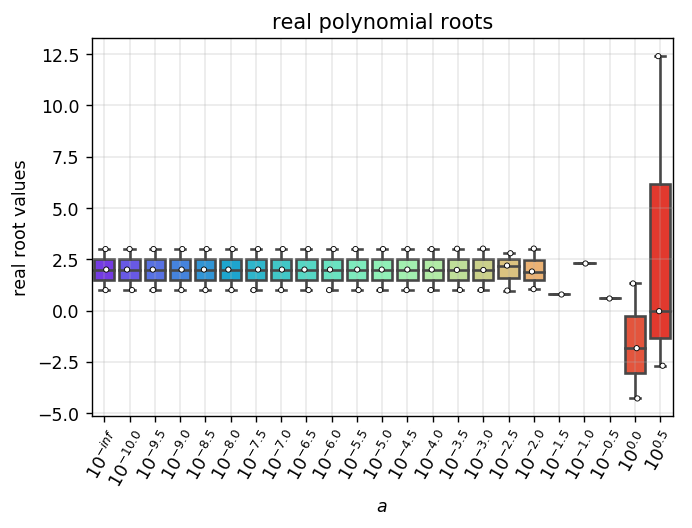

In [11]:
sns.stripplot(x='a_exp', y='values', data=a_roots_df_melt, size=3, color='white', linewidth=0.5, edgecolor='black')

#boxplot = sns.boxplot(x='a_rounded', y='values', data=a_roots_df_melt, whis=np.inf, palette='Set3')
boxplot = sns.boxplot(x='a_exp', y='values', data=a_roots_df_melt, whis=np.inf, palette='rainbow')
boxplot_xticklabels = boxplot.get_xticklabels()
display_xlabels = [{float(str(label.get_text()))} for label in boxplot_xticklabels]
boxplot.set_xticklabels(['$10^{}$'.format(label) for label in display_xlabels], rotation=60, horizontalalignment='center')

#boxplot.set_xticklabels(boxplot.get_xticklabels(), rotation=60, horizontalalignment='center')
boxplot.set(xlabel='$a$')
boxplot.set(ylabel='real root values')
boxplot.set(title='real polynomial roots')

plt.grid(linestyle='-', linewidth=0.25)
plt.show()

$a$ versus all root values

In [12]:
a_roots = []
for a in a_vals:
    trial_coeff = perturb_coeff(a, coeff_ck)
    trial_roots = roots_perturb_coeff(trial_coeff) # all roots
    a_roots.append(trial_roots)

a_roots_df = pd.DataFrame(a_roots)
a_roots_df.insert(0, 'a', a_vals)
a_roots_df.insert(0, 'a_exp', [float('-inf')] + a_exp)
#a_roots_df.insert(0, 'a_exp', [-math.inf] + a_exp)
a_roots_df.insert(0, 'a_rounded', a_roots_df['a'].round(2))
print(a_roots_df.shape)

(23, 6)


In [13]:
a_roots_df_melt = pd.melt(a_roots_df, id_vars=['a', 'a_exp', 'a_rounded'], var_name='roots', value_name='values')
a_roots_df_melt = a_roots_df_melt.sort_values(by=['a'])
a_roots_df_melt['real'] = a_roots_df_melt['values'].real
a_roots_df_melt['imaginary'] = a_roots_df_melt['values'].imag

print(a_roots_df_melt.shape)
a_roots_df_melt.head(10)

(69, 7)


,a,a_exp,a_rounded,roots,values,real,imaginary
0,0.000000e+00,-inf,0.0,0,(3.0000000000000018+0j),3.0,0.0
46,0.000000e+00,-inf,0.0,2,(1.0000000000000002+0j),1.0,0.0
23,0.000000e+00,-inf,0.0,1,(1.999999999999998+0j),2.0,0.0
1,1.000000e-10,-10.0,0.0,0,(2.9999999970117663+0j),3.0,0.0
47,1.000000e-10,-10.0,0.0,2,(0.9999999995809072+0j),1.0,0.0
24,1.000000e-10,-10.0,0.0,1,(2.0000000027474965+0j),2.0,0.0
2,3.162278e-10,-9.5,0.0,0,(3.0000000151886965+0j),3.0,0.0
48,3.162278e-10,-9.5,0.0,2,(1.0000000035338397+0j),1.0,0.0
25,3.162278e-10,-9.5,0.0,1,(1.999999982917648+0j),2.0,0.0
49,1.000000e-09,-9.0,0.0,2,(0.9999999946876214+0j),1.0,0.0


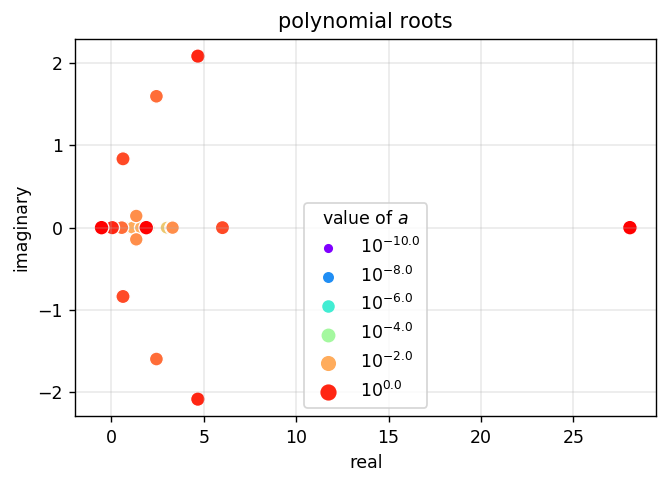

In [14]:
#a_roots_df_melt_nan = a_roots_df_melt.replace(-math.inf, -10.5) # np.nan, for legend to work
a_roots_df_melt_nan = a_roots_df_melt.replace(float('-inf'), np.nan)

cmap = 'rainbow'
#cmap = sns.color_palette('pastel', n_colors=22)
roots_plot = sns.scatterplot(x='real', y='imaginary', data=a_roots_df_melt_nan, 
                             hue='a_exp', size='a_exp', legend='full', palette=cmap)

handles, labels = roots_plot.get_legend_handles_labels()
display_labels = [{float(label)} for label in labels[1::4]]
roots_plot.legend(handles[1::4], ['$10^{}$'.format(label) for label in display_labels], title='value of $a$')
roots_plot.set_title('polynomial roots')

plt.grid(linestyle='-', linewidth=0.25)
plt.show()

### Statistical analyses 

In [15]:
real_avg = a_roots_df_melt.groupby('a_exp')['real'].mean().reset_index().rename(columns={'real':'real_avg'})
real_std = a_roots_df_melt.groupby('a_exp')['real'].std().reset_index().rename(columns={'real':'real_std'})
imag_avg = a_roots_df_melt.groupby('a_exp')['imaginary'].mean().reset_index().rename(columns={'imaginary':'imag_avg'})
imag_std = a_roots_df_melt.groupby('a_exp')['imaginary'].std().reset_index().rename(columns={'imaginary':'imag_std'})

a_roots_df_melt_stats = pd.concat([real_avg, real_std, imag_avg, imag_std], axis=1)
a_roots_df_melt_stats = a_roots_df_melt_stats.loc[:,~a_roots_df_melt_stats.columns.duplicated()]

print(a_roots_df_melt_stats.shape)
a_roots_df_melt_stats.head(10)

(23, 5)


,a_exp,real_avg,real_std,imag_avg,imag_std
0,-inf,2.000000,1.000000,0.0,0.0
1,-10.0,2.000000,1.000000,0.0,0.0
2,-9.5,2.000000,1.000000,0.0,0.0
3,-9.0,2.000000,1.000000,0.0,0.0
4,-8.5,2.000000,1.000000,0.0,0.0
5,-8.0,2.000000,1.000000,0.0,0.0
6,-7.5,2.000000,0.999999,0.0,0.0
7,-7.0,2.000000,0.999999,0.0,0.0
8,-6.5,1.999999,0.999994,0.0,0.0
9,-6.0,2.000001,1.000000,0.0,0.0


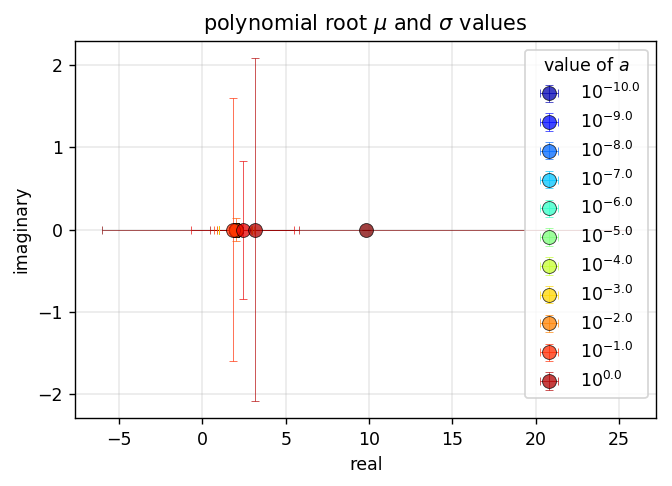

In [16]:
x, y = list(a_roots_df_melt_stats['real_avg']), list(a_roots_df_melt_stats['imag_avg'])
x_err, y_err = list(a_roots_df_melt_stats['real_std']), list(a_roots_df_melt_stats['imag_std'])
labels = list(a_roots_df_melt_stats['a_exp'])
float_labels = [{float(label)} for label in labels]
display_labels = ['$10^{}$'.format(label) for label in float_labels]

#plt.errorbar(x, y, yerr=y_err, xerr=x_err, elinewidth=0.5, capsize=2.5, ms=4, 
#             markerfacecolor='black', markeredgecolor='black', fmt='o', ecolor='blue')

n = len(x)
colors = pl.cm.jet(np.linspace(0,1,n))
for i in range(n):
    plt.errorbar(x[i], y[i], yerr=y_err[i], xerr=x_err[i], elinewidth=0.5, capsize=2.5, ms=8,
                 markerfacecolor=colors[i], markeredgecolor='black', markeredgewidth=0.5, 
                 fmt='o', ecolor=colors[i], alpha=0.75,
                 label='_nolegend_' if (i+1)%2 != 0 else display_labels[i]) #label=display_labels[i]
    
plt.xlabel('real')
plt.ylabel('imaginary')
plt.title('polynomial root $\mu$ and $\sigma$ values') # mean and standard deviations of roots by 'a' value
plt.grid(linestyle='-', linewidth=0.25)
plt.legend(title='value of $a$')
plt.show()

In [17]:
stats_melt = pd.melt(a_roots_df_melt_stats, id_vars='a_exp', var_name='statistic', value_name='val')
print(stats_melt.shape)
stats_melt.head()

(92, 3)


,a_exp,statistic,val
0,-inf,real_avg,2.0
1,-10.0,real_avg,2.0
2,-9.5,real_avg,2.0
3,-9.0,real_avg,2.0
4,-8.5,real_avg,2.0


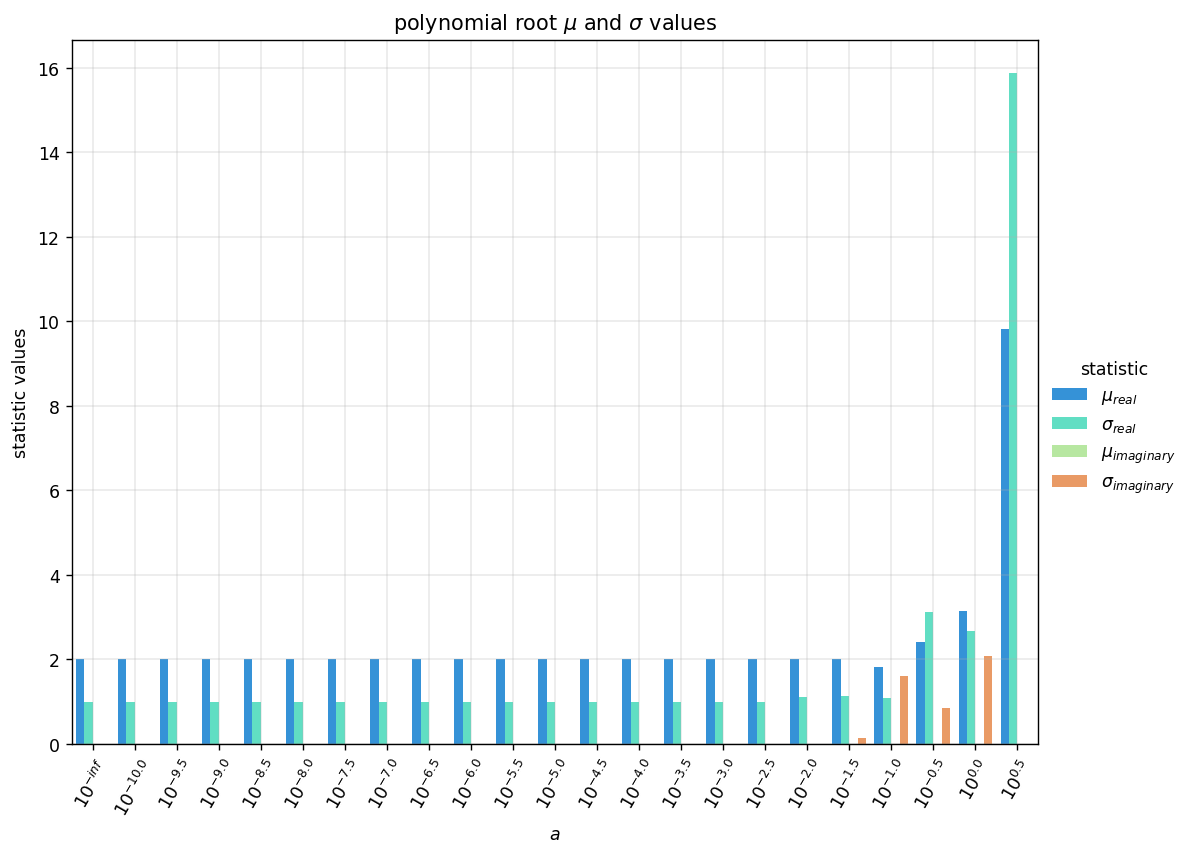

In [18]:
# for legend
stats_melt = stats_melt.replace('real_avg', '$\mu_{real}$')
stats_melt = stats_melt.replace('real_std', '$\sigma_{real}$')
stats_melt = stats_melt.replace('imag_avg', '$\mu_{imaginary}$')
stats_melt = stats_melt.replace('imag_std', '$\sigma_{imaginary}$')

# 'boxplot/display_xticklabels' because 'FacetGrid' object has no attribute 'get_xticklabels' 
barplot = sns.catplot(x='a_exp', y='val', hue='statistic', data=stats_melt, 
                      kind='bar', palette='rainbow', height=6.4, aspect=4/3)
barplot.set_xticklabels(['$10^{}$'.format(label) for label in display_xlabels], rotation=60, horizontalalignment='center')
barplot.set(xlabel='$a$')
barplot.set(ylabel='statistic values')
barplot.set(title='polynomial root $\mu$ and $\sigma$ values')

sns.despine(top=False, right=False)
plt.grid(linestyle='-', linewidth=0.25)
plt.show()